# **Setup**

* https://towardsdatascience.com/understanding-predictive-maintenance-wave-data-feature-engineering-part-1-fd22b6a19323

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from warnings import filterwarnings
filterwarnings('ignore')

# **Generate Vibration Signal**

In [2]:
def generate_vibration_signal(duration, sampling_rate, frequency, amplitude, noise_level, max_wear, wear_threshold):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    
    # Generate a sinusoidal signal
    signal = amplitude * np.sin(2 * np.pi * frequency * t)

    # Add random noise to simulate real-world conditions
    noise = np.random.normal(0, noise_level, signal.shape)
    signal_with_noise = signal + noise
    
    # Simulate equipment wear
    wear = np.linspace(0, max_wear, len(t))
    wear[wear > wear_threshold] = 0  # Reset wear if it exceeds the threshold
    signal_with_wear = signal_with_noise + wear

    return t, signal_with_wear

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


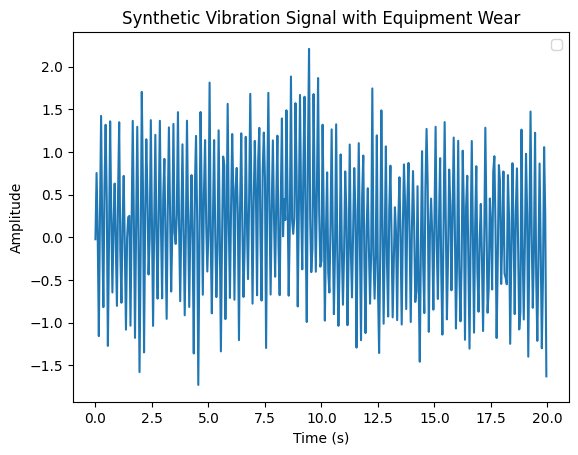

In [3]:
# Parameters
duration = 20         # seconds
sampling_rate = 20    # Hz
frequency = 5         # Hz (vibration frequency)
amplitude = 1.0       # Min Max range
noise_level = 0.3     # Noise factor to increase reality
max_wear = 1          # Maximum wear before reset
wear_threshold = 0.5  # Wear threshold for reset

# Generate synthetic vibration signal with wear and threshold
time, vibration_signal = generate_vibration_signal(duration, sampling_rate, frequency, 
                                                   amplitude, noise_level, max_wear, wear_threshold)

# Plot the signal
plt.plot(time, vibration_signal)
plt.title('Synthetic Vibration Signal with Equipment Wear')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# **Signal Windowing**

## **Window Size=2**

* Too Small Window

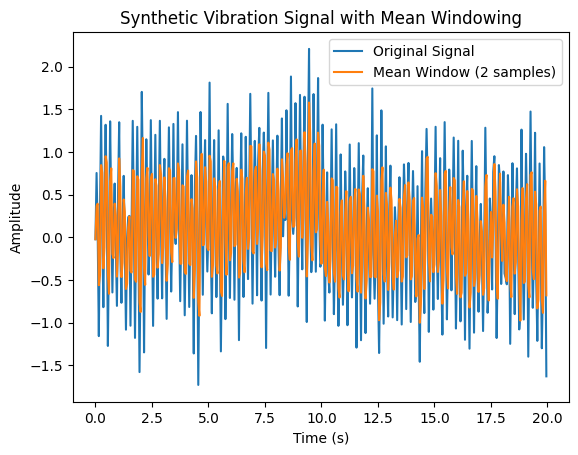

In [4]:
df_windowed = pd.DataFrame({'time': time, 'vibration_signal': vibration_signal})

# Make some experiments
window_size = int(2)  

# Apply mean windowing using the 'rolling' function
df_windowed['mean_amplitude'] = df_windowed['vibration_signal'].rolling(window=window_size, min_periods=1).mean()

# Plot the original signal and the mean windowed signal
plt.plot(df_windowed['time'], df_windowed['vibration_signal'], label='Original Signal')
plt.plot(df_windowed['time'], df_windowed['mean_amplitude'], label=f'Mean Window ({window_size} samples)')
plt.title('Synthetic Vibration Signal with Mean Windowing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **Window Size=200**
* Too Big Window 

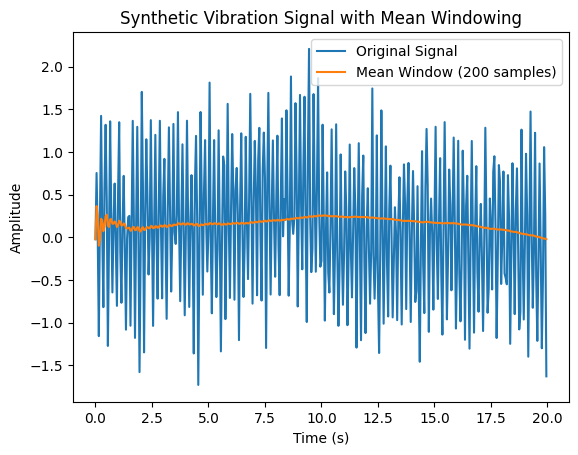

In [5]:
df_windowed = pd.DataFrame({'time': time, 'vibration_signal': vibration_signal})

# Make some experiments
window_size = int(200)  

# Apply mean windowing using the 'rolling' function
df_windowed['mean_amplitude'] = df_windowed['vibration_signal'].rolling(window=window_size, min_periods=1).mean()

# Plot the original signal and the mean windowed signal
plt.plot(df_windowed['time'], df_windowed['vibration_signal'], label='Original Signal')
plt.plot(df_windowed['time'], df_windowed['mean_amplitude'], label=f'Mean Window ({window_size} samples)')
plt.title('Synthetic Vibration Signal with Mean Windowing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **Window Size=20**
* Just Right Window Size

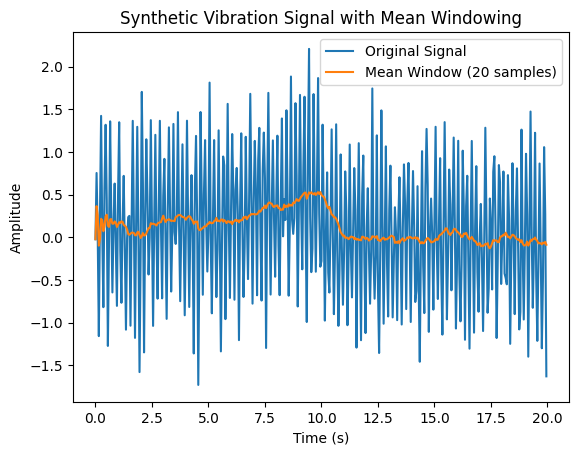

In [6]:
df_windowed = pd.DataFrame({'time': time, 'vibration_signal': vibration_signal})

# Make some experiments
window_size = int(20)  

# Apply mean windowing using the 'rolling' function
df_windowed['mean_amplitude'] = df_windowed['vibration_signal'].rolling(window=window_size, min_periods=1).mean()

# Plot the original signal and the mean windowed signal
plt.plot(df_windowed['time'], df_windowed['vibration_signal'], label='Original Signal')
plt.plot(df_windowed['time'], df_windowed['mean_amplitude'], label=f'Mean Window ({window_size} samples)')
plt.title('Synthetic Vibration Signal with Mean Windowing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# **Time Domain Signal Features**

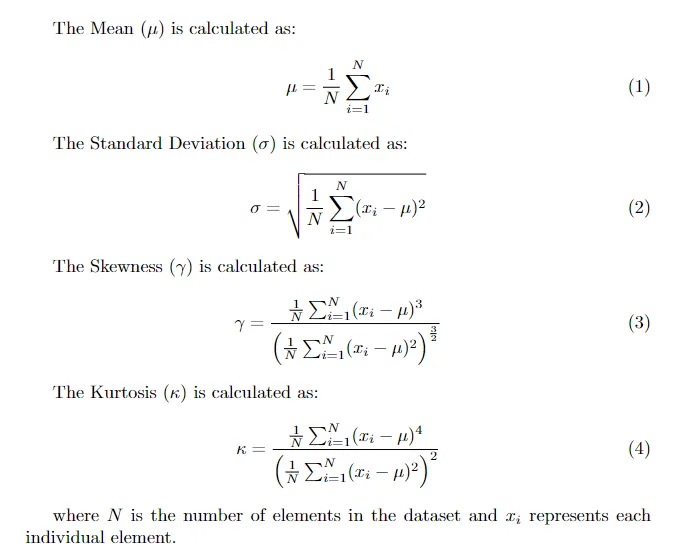

## **Skewness Comparison**

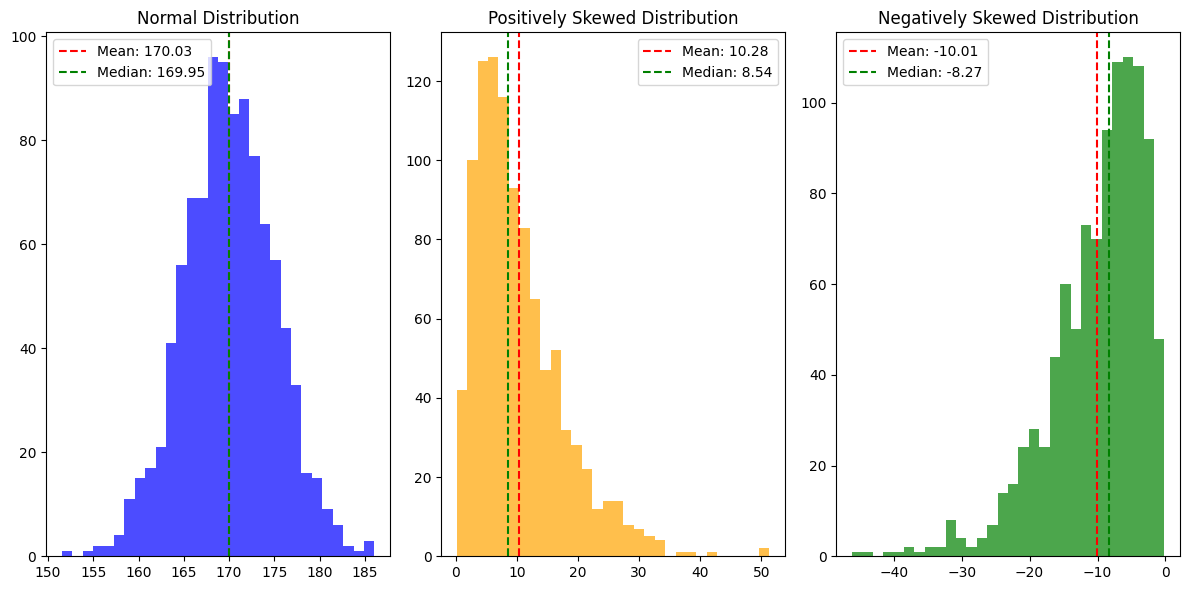

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

# Set a random seed for reproducibility
np.random.seed(1992)

# Generate synthetic datasets with varying skewness and kurtosis
# Normal distribution
normal_data = np.random.normal(loc=170, scale=5, size=1000)

# Positively skewed distribution                
skewed_data = np.random.gamma(shape=2, scale=5, size=1000)

# Negatively skewed distribution                 
negative_skewed_data = -np.random.gamma(shape=2, scale=5, size=1000)      

# Calculate mean and median for each dataset
normal_mean, normal_median = np.mean(normal_data), np.median(normal_data)
skewed_mean, skewed_median = np.mean(skewed_data), np.median(skewed_data)
negative_skewed_mean, negative_skewed_median = np.mean(negative_skewed_data), np.median(negative_skewed_data)

# Plot the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(normal_data, bins=30, color='blue', alpha=0.7)
plt.axvline(x=normal_mean, color='red', linestyle='--', label=f'Mean: {normal_mean:.2f}')
plt.axvline(x=normal_median, color='green', linestyle='--', label=f'Median: {normal_median:.2f}')
plt.legend()
plt.title('Normal Distribution')

plt.subplot(1, 3, 2)
plt.hist(skewed_data, bins=30, color='orange', alpha=0.7)
plt.axvline(x=skewed_mean, color='red', linestyle='--', label=f'Mean: {skewed_mean:.2f}')
plt.axvline(x=skewed_median, color='green', linestyle='--', label=f'Median: {skewed_median:.2f}')
plt.legend()
plt.title('Positively Skewed Distribution')

plt.subplot(1, 3, 3)
plt.hist(negative_skewed_data, bins=30, color='green', alpha=0.7)
plt.axvline(x=negative_skewed_mean, color='red', linestyle='--', label=f'Mean: {negative_skewed_mean:.2f}')
plt.axvline(x=negative_skewed_median, color='green', linestyle='--', label=f'Median: {negative_skewed_median:.2f}')
plt.legend()
plt.title('Negatively Skewed Distribution')

plt.tight_layout()
plt.show()

## **Kurtosis Comparison**

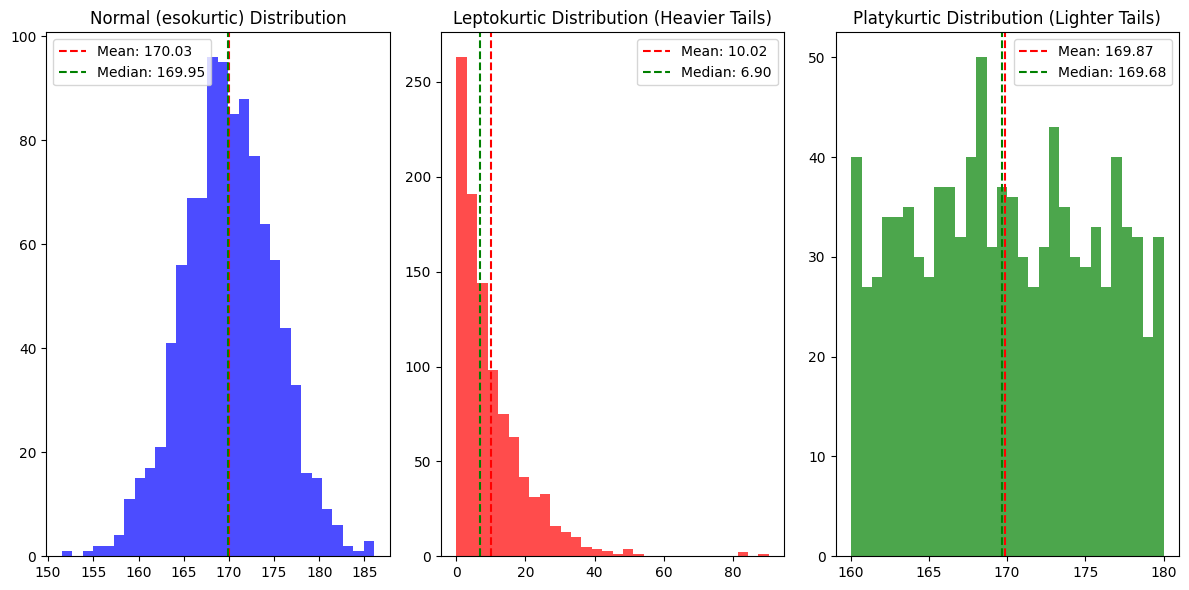

In [8]:
# Leptokurtic distribution (heavier tails)
heavy_tails_data = np.random.exponential(scale=10, size=1000)

# Platykurtic distribution (lighter tails)
light_tails_data = np.random.uniform(low=160, high=180, size=1000)        

# Calculate mean and median for each dataset
normal_mean, normal_median = np.mean(normal_data), np.median(normal_data)
heavy_tails_mean, heavy_tails_median = np.mean(heavy_tails_data), np.median(heavy_tails_data)
light_tails_mean, light_tails_median = np.mean(light_tails_data), np.median(light_tails_data)

# Plot the distributions with mean and median
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(normal_data, bins=30, color='blue', alpha=0.7)
plt.axvline(x=normal_mean, color='red', linestyle='--', label=f'Mean: {normal_mean:.2f}')
plt.axvline(x=normal_median, color='green', linestyle='--', label=f'Median: {normal_median:.2f}')
plt.legend()
plt.title('Normal (esokurtic) Distribution')

plt.subplot(1, 3, 2)
plt.hist(heavy_tails_data, bins=30, color='red', alpha=0.7)
plt.axvline(x=heavy_tails_mean, color='red', linestyle='--', label=f'Mean: {heavy_tails_mean:.2f}')
plt.axvline(x=heavy_tails_median, color='green', linestyle='--', label=f'Median: {heavy_tails_median:.2f}')
plt.legend()
plt.title('Leptokurtic Distribution (Heavier Tails)')

plt.subplot(1, 3, 3)
plt.hist(light_tails_data, bins=30, color='green', alpha=0.7)
plt.axvline(x=light_tails_mean, color='red', linestyle='--', label=f'Mean: {light_tails_mean:.2f}')
plt.axvline(x=light_tails_median, color='green', linestyle='--', label=f'Median: {light_tails_median:.2f}')
plt.legend()
plt.title('Platykurtic Distribution (Lighter Tails)')

plt.tight_layout()
plt.show()

## **Signal Data Distribution Comparison**

In [9]:
# Calculate skewness and kurtosis for each dataset
normal_skewness = skew(normal_data)
normal_kurtosis = kurtosis(normal_data)

skewed_skewness = skew(skewed_data)
skewed_kurtosis = kurtosis(skewed_data)

negative_skewness = skew(negative_skewed_data)
negative_kurtosis = kurtosis(negative_skewed_data)

heavy_tails_skewness = skew(heavy_tails_data)
heavy_tails_kurtosis = kurtosis(heavy_tails_data)

light_tails_skewness = skew(light_tails_data)
light_tails_kurtosis = kurtosis(light_tails_data)

# Print the calculated values
print("Normal Distribution:")
print(f"Skewness: {normal_skewness}, Kurtosis: {normal_kurtosis}\n")

print("Positively Skewed Distribution:")
print(f"Skewness: {skewed_skewness}, Kurtosis: {skewed_kurtosis}\n")

print("Negatively Skewed Distribution:")
print(f"Skewness: {negative_skewness}, Kurtosis: {negative_kurtosis}\n")

print("Leptokurtic Distribution (Heavier Tails):")
print(f"Skewness: {heavy_tails_skewness}, Kurtosis: {heavy_tails_kurtosis}\n")

print("Platykurtic Distribution (Lighter Tails):")
print(f"Skewness: {light_tails_skewness}, Kurtosis: {light_tails_kurtosis}\n")

Normal Distribution:
Skewness: -0.023747118662200778, Kurtosis: 0.13562505575972805

Positively Skewed Distribution:
Skewness: 1.3753017138403605, Kurtosis: 2.735797911478558

Negatively Skewed Distribution:
Skewness: -1.3357153593369862, Kurtosis: 2.4060280852590727

Leptokurtic Distribution (Heavier Tails):
Skewness: 2.344310371944749, Kurtosis: 9.967493010181288

Platykurtic Distribution (Lighter Tails):
Skewness: 0.024237350132264072, Kurtosis: -1.1455613412248278



## **Statistics With Rolling Window**

In [10]:
# Define Function
def calculate_rolling_statistics(signal, window_size):
    
    df = pd.DataFrame({'signal': signal})
    rolling_stats = df['signal'].rolling(window=window_size, min_periods=1)

    mean_values = rolling_stats.mean()
    std_dev_values = rolling_stats.std()
    skewness_values = rolling_stats.apply(skew, raw=True)
    kurtosis_values = rolling_stats.apply(kurtosis, raw=True)

    return mean_values, std_dev_values, skewness_values, kurtosis_values

window_size = 20  

# Calculate rolling statistics
rolling_means, rolling_std_devs, rolling_skewness, rolling_kurtosis = calculate_rolling_statistics(vibration_signal, window_size)

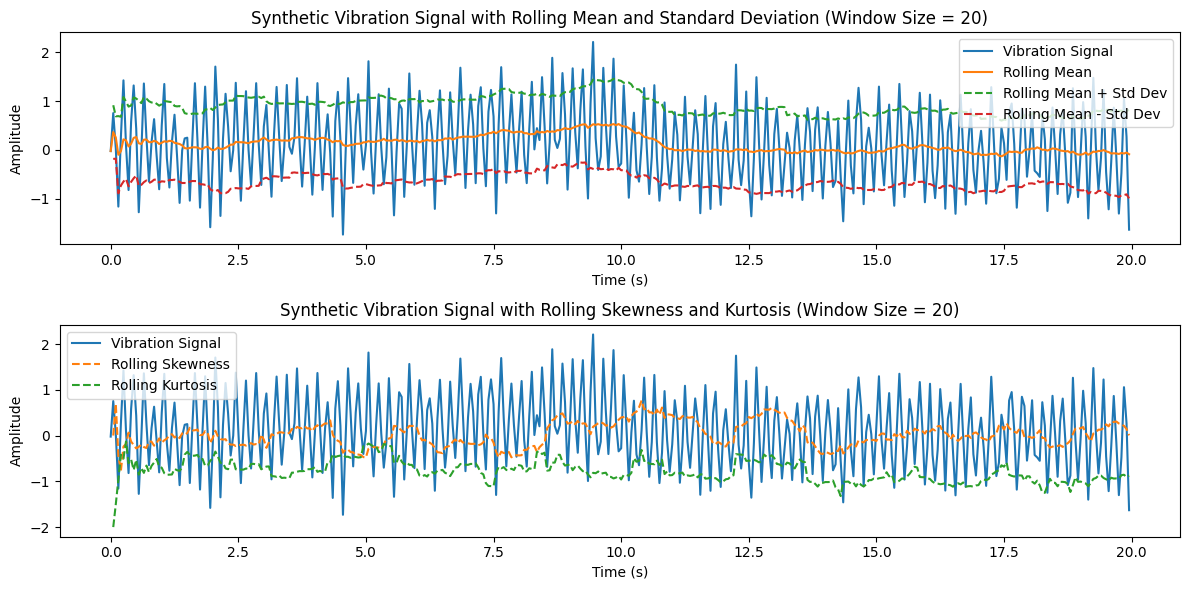

In [11]:
# Plot the signal and rolling statistics
plt.figure(figsize=(12, 6))

# Plot Rolling Mean, Rolling Mean + Std Dev, Rolling Mean - Std Dev
plt.subplot(2, 1, 1)
plt.plot(time[:len(rolling_means)], vibration_signal[:len(rolling_means)], label='Vibration Signal')
plt.plot(time[:len(rolling_means)], rolling_means, label='Rolling Mean')
plt.plot(time[:len(rolling_means)], rolling_means + rolling_std_devs, label='Rolling Mean + Std Dev', linestyle='--')
plt.plot(time[:len(rolling_means)], rolling_means - rolling_std_devs, label='Rolling Mean - Std Dev', linestyle='--')
plt.title(f'Synthetic Vibration Signal with Rolling Mean and Standard Deviation (Window Size = {window_size})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot Rolling Skewness and Rolling Kurtosis
plt.subplot(2, 1, 2)
plt.plot(time[:len(rolling_means)], vibration_signal[:len(rolling_means)], label='Vibration Signal')
plt.plot(time[:len(rolling_means)], rolling_skewness, label='Rolling Skewness', linestyle='--')
plt.plot(time[:len(rolling_means)], rolling_kurtosis, label='Rolling Kurtosis', linestyle='--')
plt.title(f'Synthetic Vibration Signal with Rolling Skewness and Kurtosis (Window Size = {window_size})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

## **Signal - RMS Value**

RMS unveils a single, robust metric that captures the underlying signal power while effectively mitigating noise. This plot serves as a visual testament to the practical efficacy of RMS in enhancing signal clarity and precision across diverse applications.

It’s a handy tool in various fields, from measuring vibrations in machinery to assessing the power of signals.

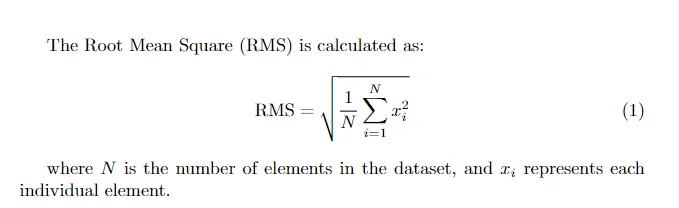

In [12]:
def calculate_rolling_rms(signal, window_size):
    df = pd.DataFrame({'signal': signal})
    rolling_stats = df['signal'].rolling(window=window_size, min_periods=1)

    rms_values = np.sqrt(rolling_stats.apply(lambda x: np.mean(x**2), raw=True))

    return rms_values

window_size = 20
rolling_rms = calculate_rolling_rms(vibration_signal, window_size)

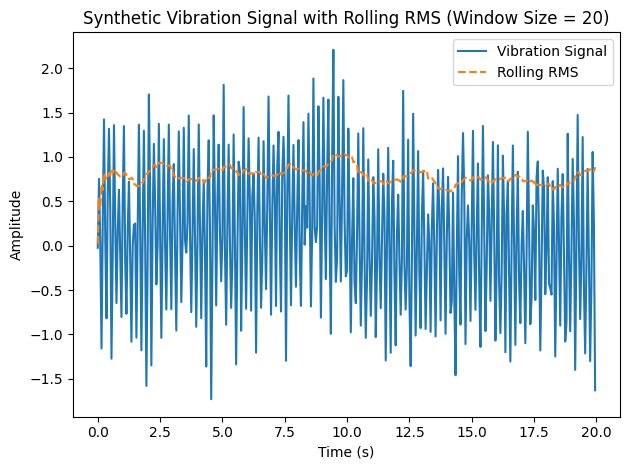

In [13]:
plt.plot(time[:len(rolling_rms)], vibration_signal[:len(rolling_rms)], label='Vibration Signal')
plt.plot(time[:len(rolling_rms)], rolling_rms, label='Rolling RMS', linestyle='--')
plt.title(f'Synthetic Vibration Signal with Rolling RMS (Window Size = {window_size})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

## **Signal - Crest Factor**

While RMS it gives you the overall intensity, Crest Factor it steps in to highlight the peaks. It’s the ratio of the highest point to the RMS value, telling you how spiky or ‘cresty’ your signal is

Think of CF as the superhero partner that helps you understand the sharp peaks in your data, whether it’s in sound waves, electrical signals, or any other fluctuating measurements.

RMS & CF jointly form a dynamic duo for unraveling the secrets hidden in your data.

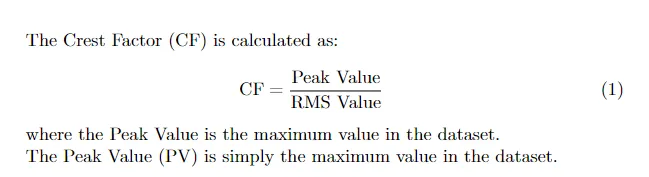

In [14]:
def calculate_crest_factor_and_peak(signal, window_size):
    df = pd.DataFrame({'signal': signal})
    rolling_stats = df['signal'].rolling(window=window_size, min_periods=1)

    peak_values = rolling_stats.apply(lambda x: np.max(np.abs(x)), raw=True)
    rms_values = np.sqrt(rolling_stats.apply(lambda x: np.mean(x**2), raw=True))

    crest_factor_values = peak_values / rms_values

    return crest_factor_values, peak_values

# Calculate rolling Crest Factor and Peak values
rolling_crest_factor, rolling_peak_values = calculate_crest_factor_and_peak(vibration_signal, window_size)

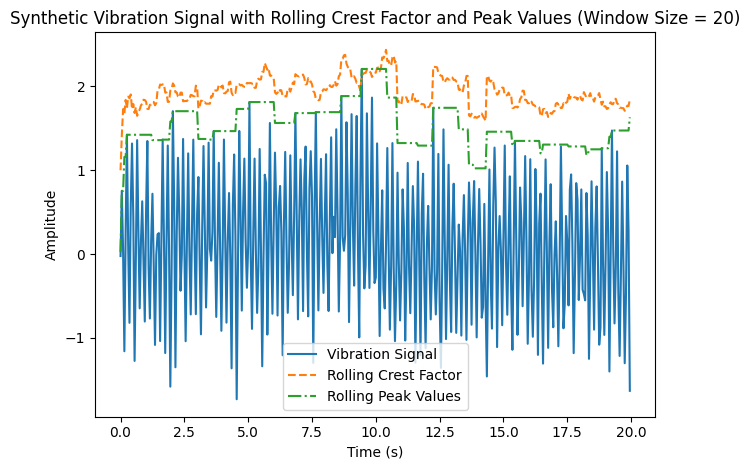

In [15]:
# Plot the vibration signal, rolling Crest Factor, and Peak values

plt.plot(time[:len(rolling_crest_factor)], vibration_signal[:len(rolling_crest_factor)], label='Vibration Signal')
plt.plot(time[:len(rolling_crest_factor)], rolling_crest_factor, label='Rolling Crest Factor', linestyle='--')
plt.plot(time[:len(rolling_peak_values)], rolling_peak_values, label='Rolling Peak Values', linestyle='-.')
plt.title(f'Synthetic Vibration Signal with Rolling Crest Factor and Peak Values (Window Size = {window_size})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# **Frequency Domain Signal Features**

**Topic List**
* Convert TD Signals to FD Signals Using Fast Fourier Transform (FFT).
* Dominant Frequency
* Spectral Entropy
* Spectral kurtosis
* Power Spectral Density (PSD) 
* Harmonic Ratios

**FFT (Fast Fourier Transform)**: Convert the time-domain signal to the frequency domain. Extract features from the resulting spectrum, such as dominant frequency, spectral entropy, and spectral kurtosis.

**Power Spectral Density (PSD)**: Describes how the power of a signal is distributed over frequency.

## **FFT**

* The FFT is a more efficient way of computing something called the Discrete Fourier Transform (DFT)
* The DFT takes our signal and expresses it as a sum of sinusoidal functions, each representing a different frequency component.
* Instead of directly computing the DFT for the entire signal, FFT takes advantage of the fact that a DFT of any composite signal can be expressed as the combination of DFTs of its subparts.
* It divides the signal into smaller sections, computes the DFT for each section, and then combines them.

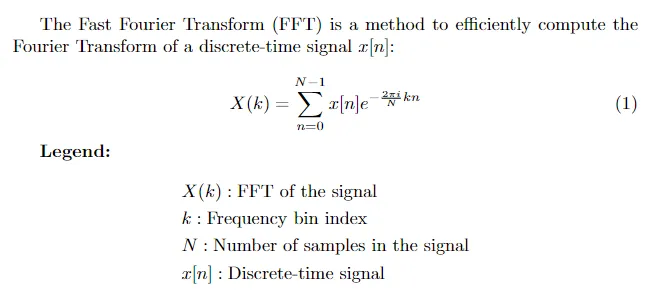

In [16]:
# Apply FFT to the signal
fft_result = np.fft.fft(vibration_signal)

# This very important part, let`s investigate it more in depth
frequencies = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

In [17]:
print('FFT Result: ','\n',fft_result[0:10])

FFT Result:  
 [ 45.81082252 +0.j         -20.58859466-31.60665036j
   3.78092415+12.08442603j  -6.72731108-18.07907136j
  -0.17441806 +8.9164625j   -0.20505108 -3.9408097j
   0.79133041 +5.73253488j  -0.68484888-11.78283019j
   3.80880095 -1.85115653j   3.29603184 -8.87814901j]


In [18]:
# No. Of Frequency Bins
len(fft_result)

400

In [19]:
print('frequencies: ','\n',frequencies[0:10])

frequencies:  
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]


## **1 Signal - 10Hz**

In [20]:
# Parameters
duration = 20         # seconds
sampling_rate = 20    # Hz
frequency = 5         # Hz (vibration frequency)
amplitude = 1.0       # Min Max range
noise_level = 0.3     # Noise factor to increase reality
max_wear = 1          # Maximum wear before reset
wear_threshold = 0.5  # Wear threshold for reset

# Generate synthetic vibration signal with wear and threshold
t1, vibration_signal = generate_vibration_signal(duration, sampling_rate,
 frequency, amplitude, noise_level, max_wear, wear_threshold)

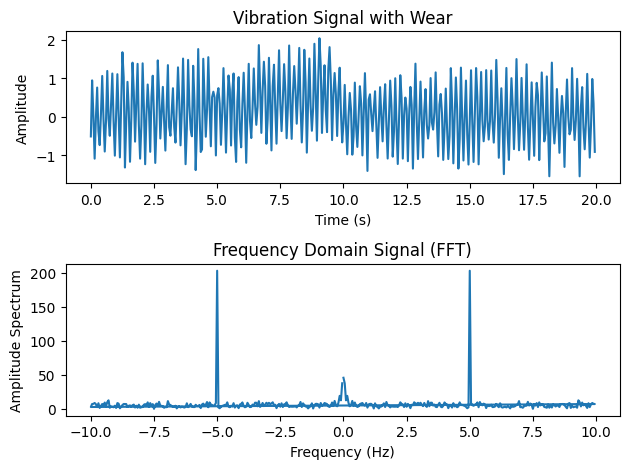

In [21]:
# Plot the time-domain signal
plt.subplot(2, 1, 1)
plt.plot(t1, vibration_signal)
plt.title('Vibration Signal with Wear')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the frequency-domain signal (FFT)
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Domain Signal (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Spectrum')

plt.tight_layout()
plt.show()

## **2 Signal - Add 20Hz**

In [22]:
# First Signal
frequency = 10  
amplitude = 1

#Second Signal
frequency = 20  
amplitude = 1

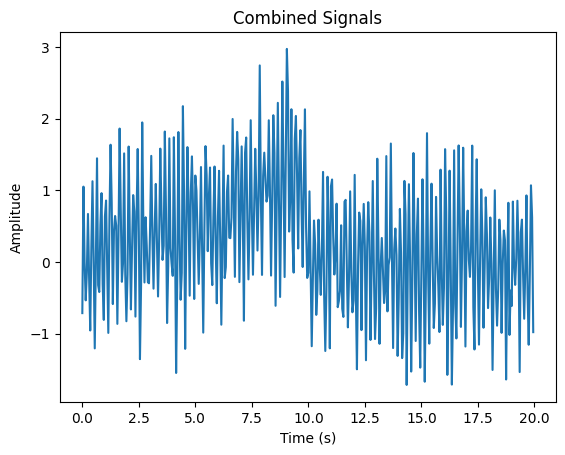

In [23]:
t2, vibration_signal_2 = generate_vibration_signal(duration, sampling_rate,
   frequency, amplitude, noise_level, max_wear, wear_threshold)


# Combine the signals just simply add them :) 
combined_signal = vibration_signal + vibration_signal_2

plt.plot(t1, combined_signal, label='Signal 1')
plt.title('Combined Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

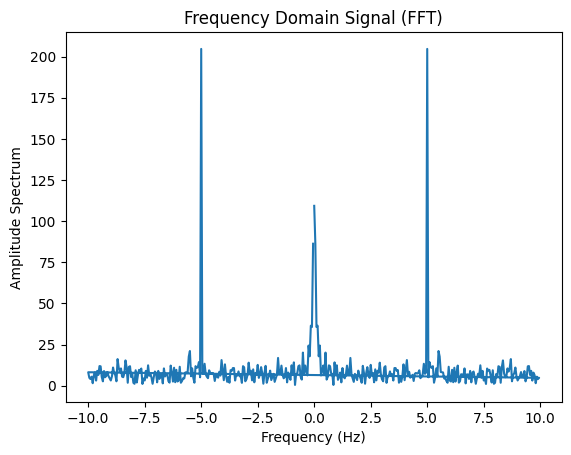

In [24]:
# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

# Plot the frequency-domain signal (FFT)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Domain Signal (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Spectrum')
plt.show()

## **4 Signal - Add 100Hz & 150Hz**

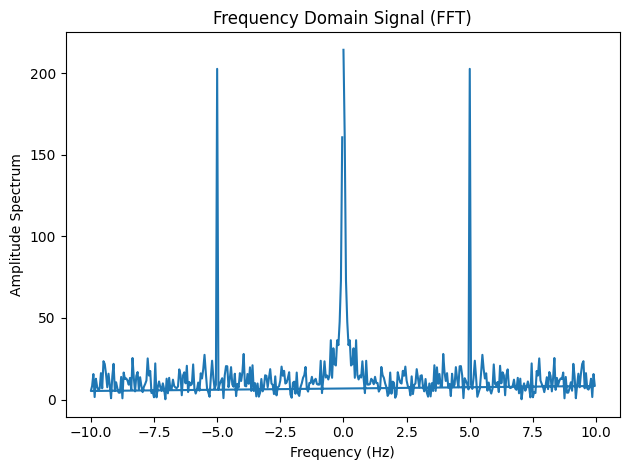

In [25]:
frequency = 100  
amplitude = 1
t3, vibration_signal_3 = generate_vibration_signal(duration, sampling_rate,
   frequency, amplitude, noise_level, max_wear, wear_threshold)


# Combine the signals just simply add them :)
combined_signal = vibration_signal + vibration_signal_2 + vibration_signal_3

frequency = 150 # Just for make offset, now you know how it works  
amplitude = 2
t4, vibration_signal_4 = generate_vibration_signal(duration, sampling_rate,
    frequency, amplitude, noise_level, max_wear, wear_threshold)

# Combine the signals
combined_signal = vibration_signal + vibration_signal_2 + vibration_signal_3 +vibration_signal_4

# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Domain Signal (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Spectrum')

plt.tight_layout()
plt.show()

## **Add 150 Hz - 2x Amplitude Signal**

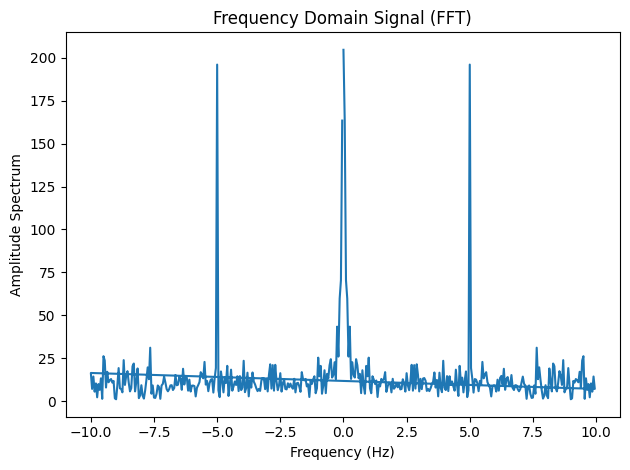

In [26]:
frequency = 150 # Just for make offset, now you know how it works  
amplitude = 2
t4, vibration_signal_4 = generate_vibration_signal(duration, sampling_rate,
    frequency, amplitude, noise_level, max_wear, wear_threshold)

# Combine the signals
combined_signal = vibration_signal + vibration_signal_2 + vibration_signal_3 + vibration_signal_4

frequency = 150 # Just for make offset, now you know how it works  
amplitude = 2
t4, vibration_signal_4 = generate_vibration_signal(duration, sampling_rate,
    frequency, amplitude, noise_level, max_wear, wear_threshold)

# Combine the signals
combined_signal = vibration_signal + vibration_signal_2 + vibration_signal_3 + vibration_signal_4

# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Domain Signal (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Spectrum')

plt.tight_layout()
plt.show()

## **Power Spectral Density (PSD)**

**Notes**
* 2 main PSD estimation methods - Welch and Barlett.

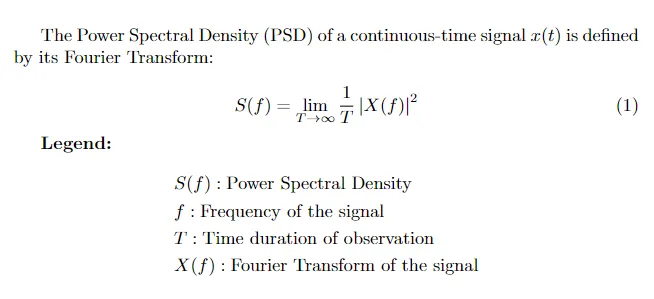

In [27]:
frequency = 100  
amplitude = 1
t5, vibration_signal_5 = generate_vibration_signal(duration, sampling_rate,
       frequency, amplitude, noise_level, max_wear, wear_threshold)

frequency = 200
amplitude = 1
t6, vibration_signal_6 = generate_vibration_signal(duration, sampling_rate, 
       frequency, amplitude, noise_level, max_wear, wear_threshold)


frequency = 400
amplitude = 3
t7, vibration_signal_7 = generate_vibration_signal(duration, sampling_rate,
       frequency, amplitude, noise_level, max_wear, wear_threshold)

combined_signal2 = vibration_signal_5 + vibration_signal_6 + vibration_signal_7

### **Welch Method**

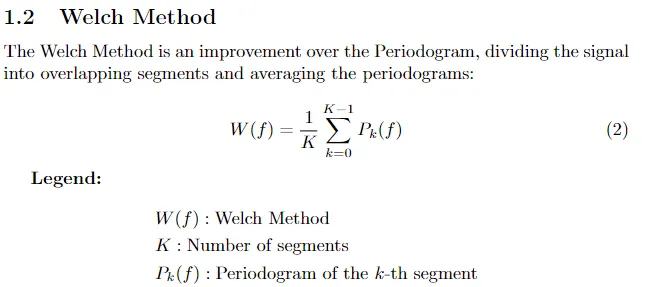

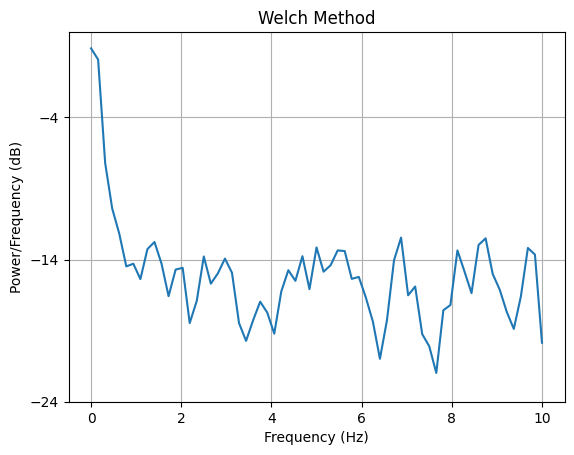

In [28]:
def welch_method(signal, segment_size=128, overlap=64):
    f, Pxx = plt.psd(signal, NFFT=segment_size, Fs=sampling_rate, noverlap=overlap)
    plt.title('Welch Method')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB)')
    plt.show()
    return f, Pxx

freq_welch, P_welch = welch_method(combined_signal2)

### **Bartlet Method**

**Notes**
* Bartlett method is a specific case of the Welch method with no overlap between segments.

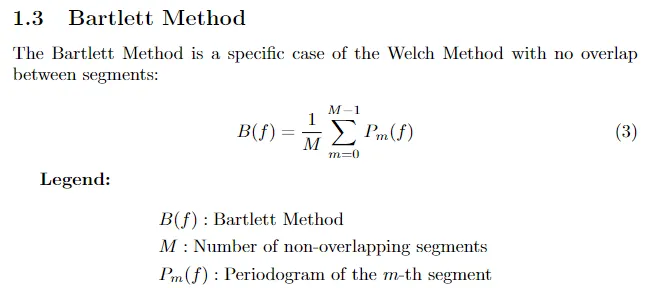

In [29]:
def bartlett_method(signal, segment_size=128):
    f, Pxx = plt.psd(signal, NFFT=segment_size, Fs=sampling_rate, window=np.bartlett(segment_size))
    plt.title('Bartlett Method')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB)')
    plt.show()
    return f, Pxx

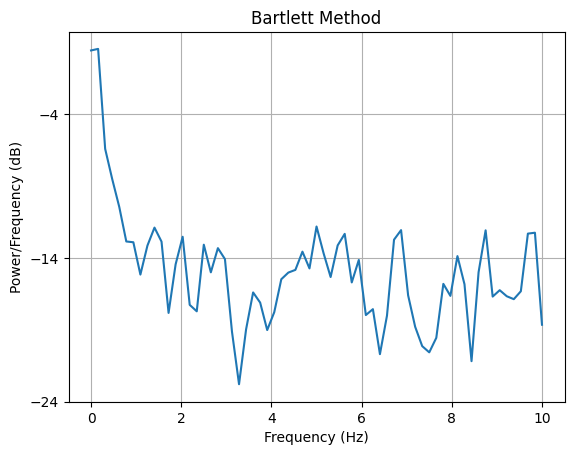

In [30]:
freq_bartlett, P_bartlett = bartlett_method(combined_signal2)

## **STFT**

* Short-Time Fourier Transform (STFT) — windowing + FFT
* STFT analysis enables engineers to scrutinize the frequency components of signals, such as vibrations or acoustic emissions from machinery.
* One of the primary advantages of STFT in predictive maintenance is its ability to identify fault signatures early on
* STFT plays a pivotal role in distinguishing between normal and anomalous frequency patterns

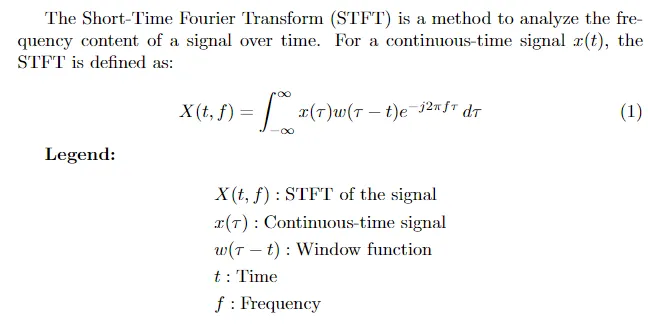

In [31]:
from scipy.signal import spectrogram

# Apply Short-Time Fourier Transform (STFT) to the combined signal
frequencies, times, Sxx = spectrogram(combined_signal2, fs=sampling_rate,
nperseg=256, noverlap=128)

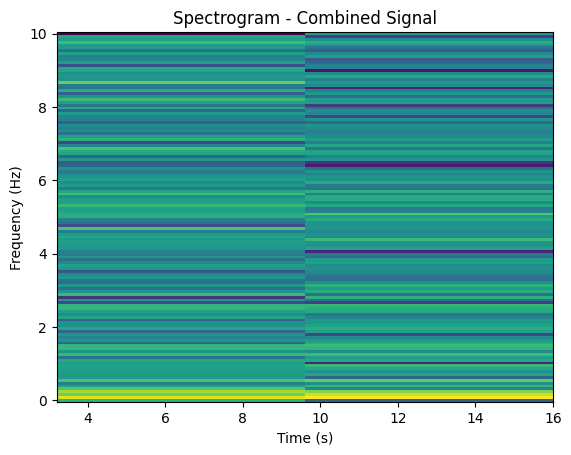

In [32]:
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
plt.title('Spectrogram - Combined Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

### **Simulate A Faulty Machine Signal**

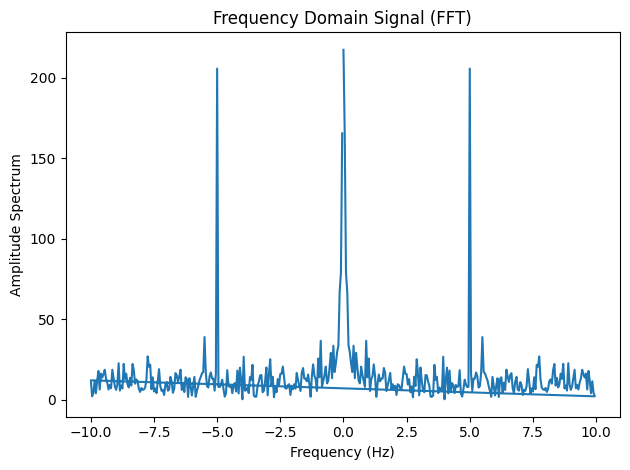

In [33]:
amplitude = 20 # Increase it 
t4, vibration_signal_4 = generate_vibration_signal(duration, sampling_rate,
  frequency, amplitude, noise_level, max_wear, wear_threshold)

# Combine the signals
combined_signal = vibration_signal + vibration_signal_2 + vibration_signal_3 + vibration_signal_4

# Apply FFT to the combined signal
fft_result = np.fft.fft(combined_signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Domain Signal (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Spectrum')

plt.tight_layout()
plt.show()

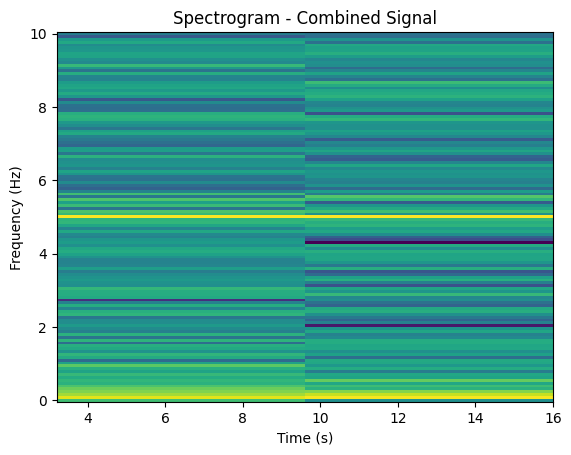

In [34]:
from scipy.signal import spectrogram

# Apply Short-Time Fourier Transform (STFT) to the combined signal
frequencies, times, Sxx = spectrogram(combined_signal, fs=sampling_rate, nperseg=256, noverlap=128)

plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
plt.title('Spectrogram - Combined Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()